In [ ]:
#
# 0 - homem
# 1 - mulher
#
# REGRESSÃO LOGÍSTICA É PARA CLASSIFICAÇÃO
#
# 0 ou 1
# y >= 0.5 y = 1
# y <  0.5 y = 0
#
# 0.52 => 0 ou 1
#
# MATRIZ DE CONFUSÃO
#
# amostra de treino
# amostra de teste
#
#   NEGATIVO ou POSITIVO
#
# MATRIZ DE CONFUSÃO
#
# POSITIVO        FALSO-POSITIVO
# FALSO-NEGATIVO  NEGATIVO
#
# RELAÇÃO NEGATIVO = NEGATIVO / ( FALSO-NEGATIVO + NEGATIVO )
# NEGATIVO: 50
# FALSO-NEGATIVO: 10
# 50 / 50 + 10 => 50 / 60 => 0,83 => 83%
#
# POSITIVO: 100
# FALSO-POSITIVO: 25
# RELAÇÃO: 100 / 100 + 25 => 100 / 125 => 0,8 => 80%



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDS/Aula 6/Social_Network_Ads.csv')
df['male'] = df.apply(lambda row: 1 if row['Gender'] == 'Male' else 0, axis=1)

df_train = df.sample(200)
df_test = df.drop(df_train.index)


Text(0.5, 23.52222222222222, 'Y previsto')

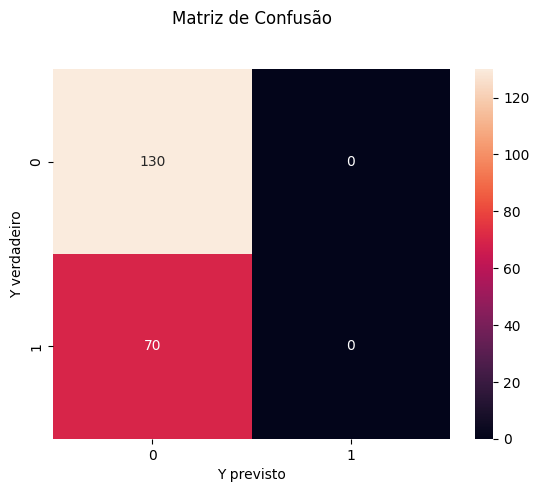

In [19]:
X_train = df_train[['male','Age','EstimatedSalary']].to_numpy()
Y_train = df_train['Purchased'].to_numpy()

X_test = df_test[['male','Age','EstimatedSalary']].to_numpy()
Y_test = df_test['Purchased'].to_numpy()

classificador = LogisticRegression()
classificador.fit(X_train, Y_train)

Y_predicted = classificador.predict(X_test)

matriz_confusao = confusion_matrix(Y_test, Y_predicted)

sns.heatmap(pd.DataFrame(matriz_confusao), annot=True, fmt='g')
plt.title("Matriz de Confusão", y=1.1)
plt.ylabel("Y verdadeiro")
plt.xlabel("Y previsto")


<Axes: >

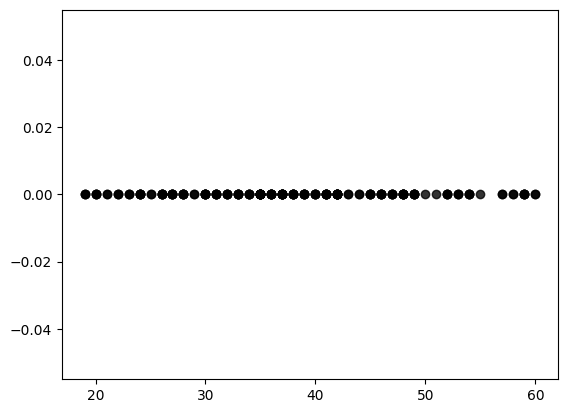

In [14]:
accuracy_score(Y_test, Y_predicted)
sns.regplot(x=df_test['Age'].to_numpy(), y=Y_predicted, data=df_test, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
